# Audio Data augmentation

In this Notebook we will do data augmentation for sound files (.wav).

With a list of .wav files as input, we will do Data Augmentation to get a larger dataset to train Deep Learning models.

Four augmentations are used here:
1. Noise Addition - Adding noise to the sound sample
2. Shifting Sound wave - Shifting the sound sample 
3. Time-stretching - Making the sample longer/shorter
4. Pitch-shifting - Changing the pitch of the sample


## Contents
0. Import the packages
1. Import the data
2. Do data augmentation for 1 file at the time - including visualisations
3. Data augmentation for a list of files (as in 2. but everything in one script) 

<i>Partly based on: https://gist.github.com/keyurparalkar</i>

## 0. Import the packages

In [2]:
from glob import glob
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from scipy.io import wavfile
import soundfile as sf

## 1. Import the data 

In [3]:
# import the data and assign to variable. Please change the path!
from glob import glob
wav_files = glob('*.wav') 
print(wav_files)

['my-audio.wav', 'new_file.wav', 'out.wav', 'file.wav', 'loudness.wav', 'test2.wav', 'claxon_iphone.wav', 'test3.wav', 'my_wav.wav', 'mywav_reduced_noise2.wav', 'Yoda.wav', 'piano_c.wav', 'claxon_michiel.wav', 'claxon_close.wav', 'miaow_16k.wav', 'tone_220.wav', 'welcome.wav', 'silence.wav', 'example.wav', '11k16bitpcm.wav', 'claxon_freesound.wav', 'robot0.wav', 'my_test.wav', 'converted.wav', 'speech_whistling2.wav', 'robot1.wav', 'mywav_reduced_noise.wav', 'robot3.wav', 'test.wav', 'noise_add.wav', 'converted2.wav', 'robot2.wav', 'Sample_audio.wav', 'tone_440.wav', 'claxon_1m.wav', 'output.wav']


## 2. Audio Data Augmentation for 1 file with visualisations

In [4]:
#select one file and load the file with librosa
file_path = wav_files[0] # select file!
wav, sr = librosa.load(file_path,sr=None)

In [5]:
import glob, os
file, ext = os.path.splitext(file_path)
print(file)#print some parameters
print(file_path)
print(f'The sample rate is: {sr}')

my-audio
my-audio.wav
The sample rate is: 44100


In [6]:
#define the plotting function function
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,4))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  # fig.savefig('temp1.png',bbox_inches="tight",pad_inches=0)
  ax[1].set_ylabel('Amplitude')
  ax[1].set_xlabel('Length')  
  ax[1].plot(np.linspace(0,1,len(data)), data)

/Users/michielbontenbal/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


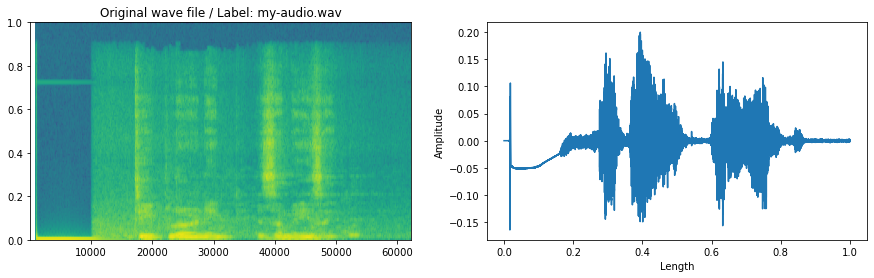

In [7]:
#call the plotting function
plot_spec(wav,sr,'Original wave file',file_path)
ipd.Audio(data=wav,rate=sr)

### 2a: Add noise

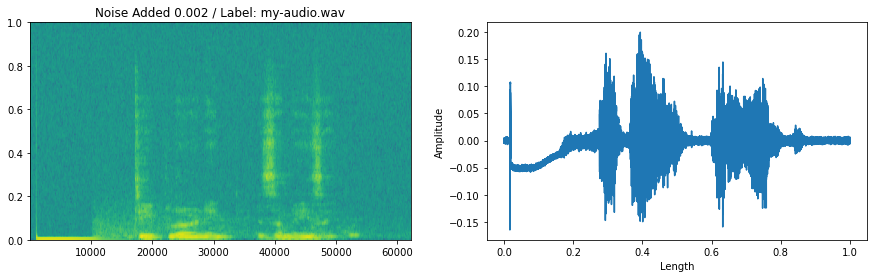

In [8]:
#add noise to the sample
'''
Noise addition using normal distribution with mean = 0 and std =1
Permissible noise factor value = x > 0.004
'''
wav_n = wav + 0.002*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.002',fpath=file_path)
ipd.Audio(data=wav_n,rate=sr)
#sf.write('./augmented/'+ file+ '_noise_add.wav', wav_n, sr) #uncomment to save as new wav

### 2b. Shift the sound wave

/Users/michielbontenbal/opt/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


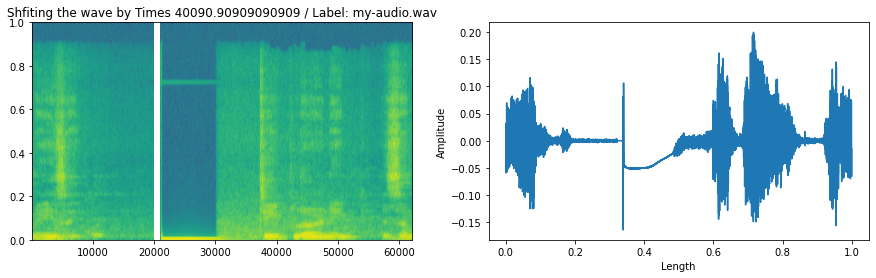

In [12]:
#Shifting the sound wave
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr/1.1))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/1.1}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)
#sf.write('./augmented/'+ file+ '_roll3.wav', wav_roll, sr)#uncomment to save as new wav

### 2c. Time stretch the wave

/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_82452/1577837019.py:7: FutureWarning: Pass rate=0.9 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav_time_stch = librosa.effects.time_stretch(wav,factor)


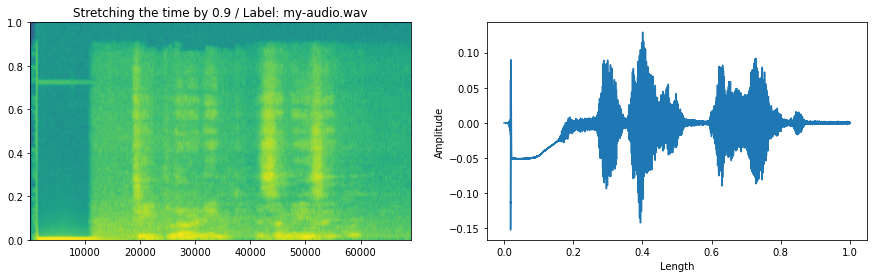

In [11]:
#Time-stretching the wave
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.9
wav_time_stch = librosa.effects.time_stretch(wav,factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)
#sf.write('./augmented/'+ file+ '_time_stretch.wav', wav_time_stch, sr) #uncomment to write as new wav

### 2d. Shift pitch

/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_82452/252252221.py:5: FutureWarning: Pass sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=-1)


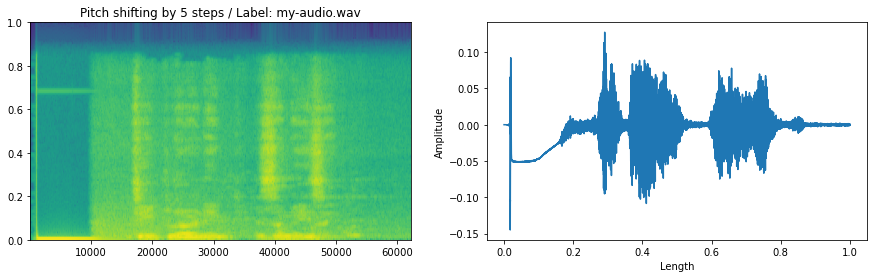

In [15]:
#pitch shifting of wav higer
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=-1)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {5} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)
#sf.write('./augmented/'+ file +'_pitch_shift.wav', wav_pitch_sf, sr) #uncomment to write as new wav

## 3. Audio Data Augmentation for a list of files

As above but now in one script.

In [9]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2818-58FB

 Directory of C:\Users\31653\Desktop\Prive\robot_wakeword\training

24/11/2021  18:58    <DIR>          .
24/11/2021  18:58    <DIR>          ..
24/11/2021  18:58            25.026 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s1.wav
24/11/2021  18:58            25.998 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s2.wav
24/11/2021  18:58            21.782 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s3.wav
24/11/2021  18:58            21.782 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s4.wav
24/11/2021  18:58            22.774 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s5.wav
24/11/2021  18:58            21.250 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s6.wav
24/11/2021  18:58            22.226 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s7.wav
24/11/2021  18:58            21.254 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s8.wav
24/11/2021  18:58         

In [18]:
from glob import glob
wav_files = glob('*.wav') 
wav_files

['my-audio.wav',
 'new_file.wav',
 'out.wav',
 'file.wav',
 'loudness.wav',
 'test2.wav',
 'claxon_iphone.wav',
 'test3.wav',
 'my_wav.wav',
 'mywav_reduced_noise2.wav',
 'Yoda.wav',
 'piano_c.wav',
 'claxon_michiel.wav',
 'claxon_close.wav',
 'miaow_16k.wav',
 'tone_220.wav',
 'welcome.wav',
 'silence.wav',
 'example.wav',
 '11k16bitpcm.wav',
 'claxon_freesound.wav',
 'robot0.wav',
 'my_test.wav',
 'converted.wav',
 'speech_whistling2.wav',
 'robot1.wav',
 'mywav_reduced_noise.wav',
 'robot3.wav',
 'test.wav',
 'noise_add.wav',
 'converted2.wav',
 'robot2.wav',
 'Sample_audio.wav',
 'tone_440.wav',
 'claxon_1m.wav',
 'output.wav']

In [15]:
# define the functions
'''
Function for applying following transforms on the wave files:
1. Noise Addition using normal distribution of mean =0 and std =1
2. Shifting Sound wave
3. Time-stretching
4. Pitch - shifting of a wave
'''
import glob, os
import librosa
import numpy as np
import soundfile as sf
wav_files = glob.glob('*.wav') 
for i in range(len(wav_files)):
    file, ext = os.path.splitext(wav_files[i]) #always 2 variables with spitext
    file_path= wav_files[i] 

    wav, sr = librosa.load(file_path,sr=None)

    #augmentation 1: Noise addition:
    noise_factor = 0.002 
    wav_n = wav + noise_factor * np.random.normal(0,1,len(wav))
    sf.write('./augmented/' +file + '_noise_add.wav', wav_n, sr)

    #augmentation 2: Shifting Sound wave. This effect is created by dividing the samplerate by a certain factor
    shift_factor = 1.1
    wav_roll = np.roll(wav,int(sr/shift_factor))
    sf.write('./augmented/'+ file + '_roll.wav', wav_roll, sr)

    #Augmentation 3: ShiftingTime - stretching
    time_factor = 0.9
    wav_time_stch = librosa.effects.time_stretch(wav,time_factor)
    sf.write('./augmented/' + file+ '_time_stretch.wav', wav_time_stch, sr)

    #Augmentation 4:Pitch - Shifting
    # Permissible factor values = -5 <= x <= 5
    pitch_factor = -1
    wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=pitch_factor)
    sf.write('./augmented/'+ file + '_pitch_shift.wav', wav_pitch_sf, sr)  

print('done')

done


In [16]:
#check results
wav_augmented = glob.glob('./augmented/*.wav')
len(wav_augmented)

128